In [1]:
using CSV, DataFrames
using FileIO, Dates
using GraphIO
using Plots
using StatsBase, LinearAlgebra

include("../region_cube_split/cubes.jl")
include("../region_network_create/network.jl")
include("../motifs_analysis/histogram_fit.jl")

power_law (generic function with 1 method)

In [2]:
romania_full = CSV.read("../data/romania.csv", DataFrame);
romania = romania_full[romania_full.Datetime .> DateTime(1976,1,1,0,0,0),:];

vrancea = romania[(romania.Latitude .>= 45.20) .& (romania.Latitude .<= 46.0) .& 
                    (romania.Longitude .>= 26.0) .& (romania.Longitude .<= 27.0) .&
                    (romania.Depth .>= 50.0) .& (romania.Depth .<= 200.0) .&
                    (romania.Magnitude .> 1.0), :];

In [3]:
vrancea, vrancea_cubes = region_cube_split(vrancea,side=5);

In [4]:
MG = create_network(vrancea, vrancea_cubes; edgeWeight=true)
fit_data = degree(MG);

In [5]:
# romania, romania_cubes = region_cube_split(romania,side=5)
# MG_RO = create_network(romania, romania_cubes; edgeWeight=true)
# fit_data = degree(MG_RO);

In [6]:
nbins = Int(ceil(sqrt(length(fit_data))))

42

In [7]:
bstep = 2 * iqr(fit_data) * length(fit_data) ^ (-1/3)
b = minimum(fit_data) : bstep : maximum(fit_data)
collect(b);


In [8]:
h = StatsBase.fit(Histogram{Float64}, fit_data, nbins=nbins)

Histogram{Float64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  0.0:2.0:84.0
weights: [3.0, 765.0, 247.0, 146.0, 86.0, 81.0, 59.0, 38.0, 43.0, 41.0  …  3.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]
closed: left
isdensity: false

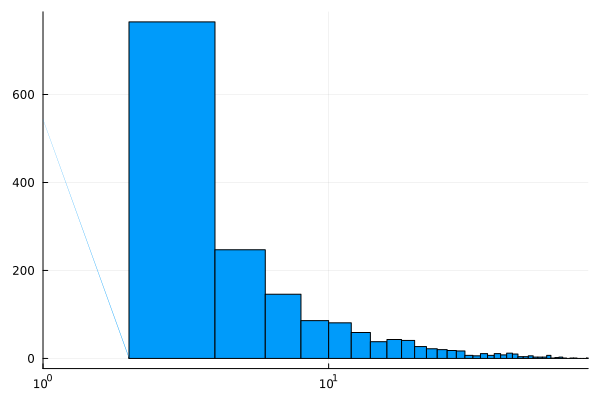

In [9]:
plot(h ; label="",xscale=:log10, xlim=extrema(b))

In [12]:
h = StatsBase.fit(Histogram{Float64}, fit_data, b)

Histogram{Float64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  1.0:1.3338481338992862:81.03088803395717
weights: [763.0, 5.0, 247.0, 139.0, 7.0, 86.0, 71.0, 10.0, 59.0, 32.0  …  0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
closed: left
isdensity: false

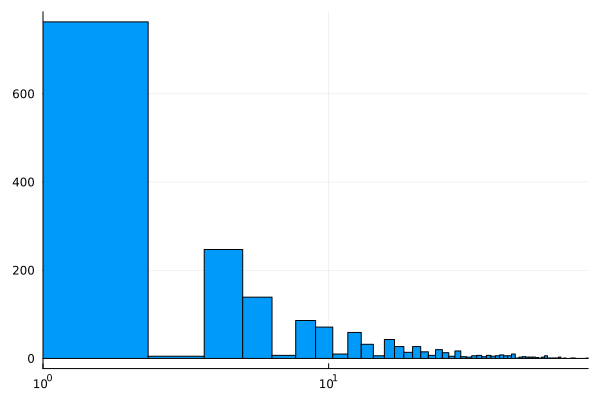

In [13]:
plot(h ; label="",xscale=:log10, xlim=extrema(b))

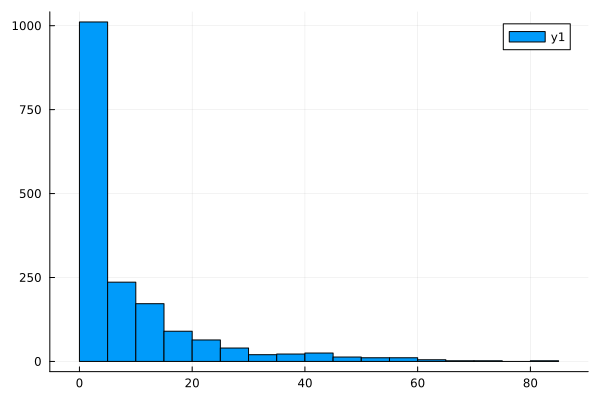

In [14]:
h = histogram(fit_data, nbins = 30)

In [ ]:
plot(h ; label="",xscale=:log10, xlim=extrema(b))

In [15]:
using DataStructures

ArgumentError: ArgumentError: Package DataStructures not found in current path.
- Run `import Pkg; Pkg.add("DataStructures")` to install the DataStructures package.

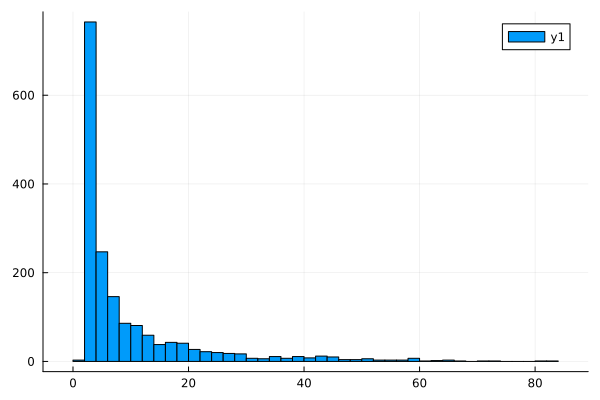

In [17]:
h,x,y = histogram_fit(data)

(Histogram{Float64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  1.0:1.3338481338992862:81.03088803395717
weights: [763.0, 5.0, 247.0, 139.0, 7.0, 86.0, 71.0, 10.0, 59.0, 32.0  …  0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
closed: left
isdensity: false, Any[1.666924066949643, 3.000772200848929, 4.334620334748216, 5.668468468647502, 7.002316602546788, 8.336164736446074, 9.67001287034536, 11.003861004244648, 12.337709138143932, 13.67155727204322  …  52.35315315512252, 53.68700128902181, 55.02084942292109, 56.35469755682038, 57.688545690719664, 59.02239382461895, 60.35624195851824, 61.69009009241752, 63.023938226316815, 64.3577863602161], [0.9219582861149848, 0.006041666357241054, 0.29845831804770806, 0.1679583247313013, 0.008458332900137476, 0.10391666134454612, 0.08579166227282296, 0.012083332714482108, 0.07129166301544443, 0.03866666468634274  …  0.003624999814344632, 0.0024166665428964214, 0.0012083332714482107, 0.

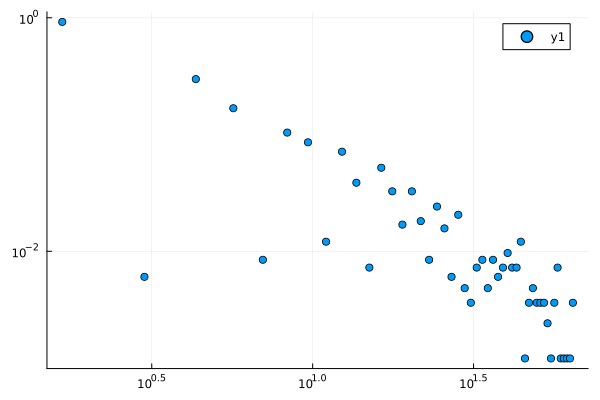

In [18]:
scatter(x,y,xscale=:log10,yscale=:log10)